In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Interpretability libraries
import shap
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
## Loading the dataset into pandas dataframe
df=pd.read_csv('diabetes_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Exploratory Data Analysis

Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:

df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [8]:

## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history', 'gender'], drop_first=False)
df.head()   

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0,0,1,0


In [9]:
## dropping null values
df=df.dropna(how='any')

In [10]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

In [11]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Female,gender_Male,gender_Other
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,-0.276945,0.030946,0.065768,0.216481,0.065498,0.067663,0.030480,-0.030282,-0.007348
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,-0.117210,0.017930,0.023124,0.083401,0.045953,0.000997,-0.014318,0.014423,-0.003816
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,-0.052398,0.007604,0.040671,0.095194,-0.030843,0.007922,-0.077832,0.077911,-0.002718
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,-0.222553,0.053617,0.044343,0.111312,0.086849,0.034979,0.023016,-0.023021,0.000119
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.045979,0.006123,0.009655,0.037306,0.010684,0.009830,-0.020015,0.020058,-0.001528
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,-0.051635,0.012447,0.006267,0.040688,0.012475,0.008613,-0.017200,0.017189,0.000457
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,-0.118939,0.019606,0.024080,0.097917,0.027267,0.020734,-0.037553,0.037666,-0.004090
smoking_history_No Info,-0.276945,-0.117210,-0.052398,-0.222553,-0.045979,-0.051635,-0.118939,1.000000,-0.239002,-0.152562,-0.239938,-0.549299,-0.196099,-0.053810,0.053833,-0.000695
smoking_history_current,0.030946,0.017930,0.007604,0.053617,0.006123,0.012447,0.019606,-0.239002,1.000000,-0.065343,-0.102766,-0.235267,-0.083990,-0.026517,0.026636,-0.004293
smoking_history_ever,0.065768,0.023124,0.040671,0.044343,0.009655,0.006267,0.024080,-0.152562,-0.065343,1.000000,-0.065598,-0.150177,-0.053613,-0.011019,0.010991,0.001062


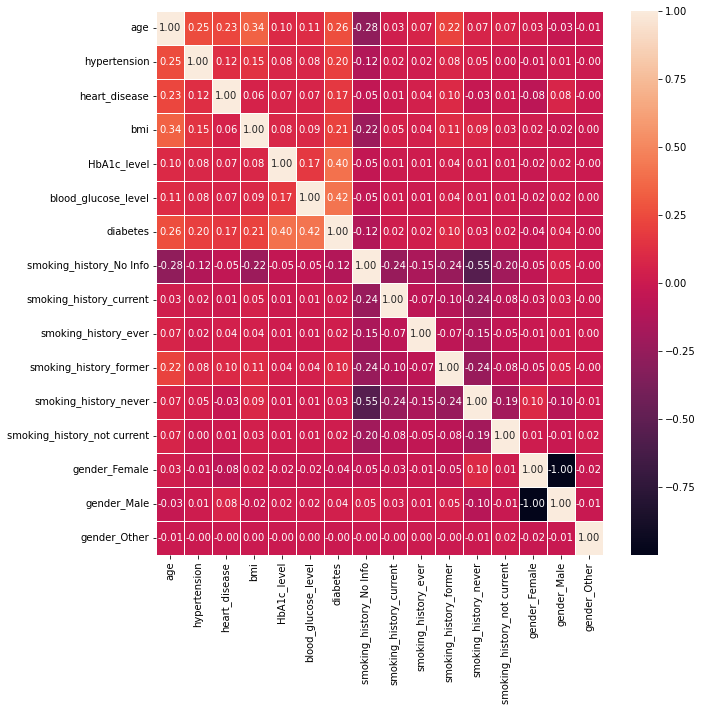

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering

 Splitting the data into features and target variables

In [13]:

## Splitting the data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (100000, 15)
Target vector shape: (100000,)


In [14]:
# Split the data (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Completes set: {X.shape[0]} samples")
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")




 Completes set: 100000 samples

Train set: 80000 samples
Test set: 20000 samples


In [15]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model development and training

In [16]:
# Initializing models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf')
}

# Training individual models and store results
individual_models = {}
individual_predictions = {}
individual_probabilities = {}

print("Training individual models...")
print("="*50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Using scaled data for LR and SVM and  original data for RF
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
        test_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        test_proba = model.predict_proba(X_test)[:, 1]
    
    # Store model and predictions
    individual_models[name] = model
    individual_predictions[name] = test_pred
    individual_probabilities[name] = test_proba
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred, zero_division=0)
    test_recall = recall_score(y_test, test_pred, zero_division=0)
    test_f1 = f1_score(y_test, test_pred, zero_division=0)
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    print(f"Confusion Matrix:\n{cm}")

print("\nIndividual model training completed!")

Training individual models...

Training Random Forest...


Train Accuracy: 0.9616
Test Accuracy: 0.9628
Test Precision: 1.0000
Test Recall: 0.5629
Test F1-Score: 0.7204
Confusion Matrix:
[[18300     0]
 [  743   957]]

Training Logistic Regression...
Train Accuracy: 0.9603
Test Accuracy: 0.9605
Test Precision: 0.8593
Test Recall: 0.6394
Test F1-Score: 0.7332
Confusion Matrix:
[[18122   178]
 [  613  1087]]

Training SVM...
Train Accuracy: 0.9635
Test Accuracy: 0.9633
Test Precision: 0.9662
Test Recall: 0.5888
Test F1-Score: 0.7317
Confusion Matrix:
[[18265    35]
 [  699  1001]]

Individual model training completed!


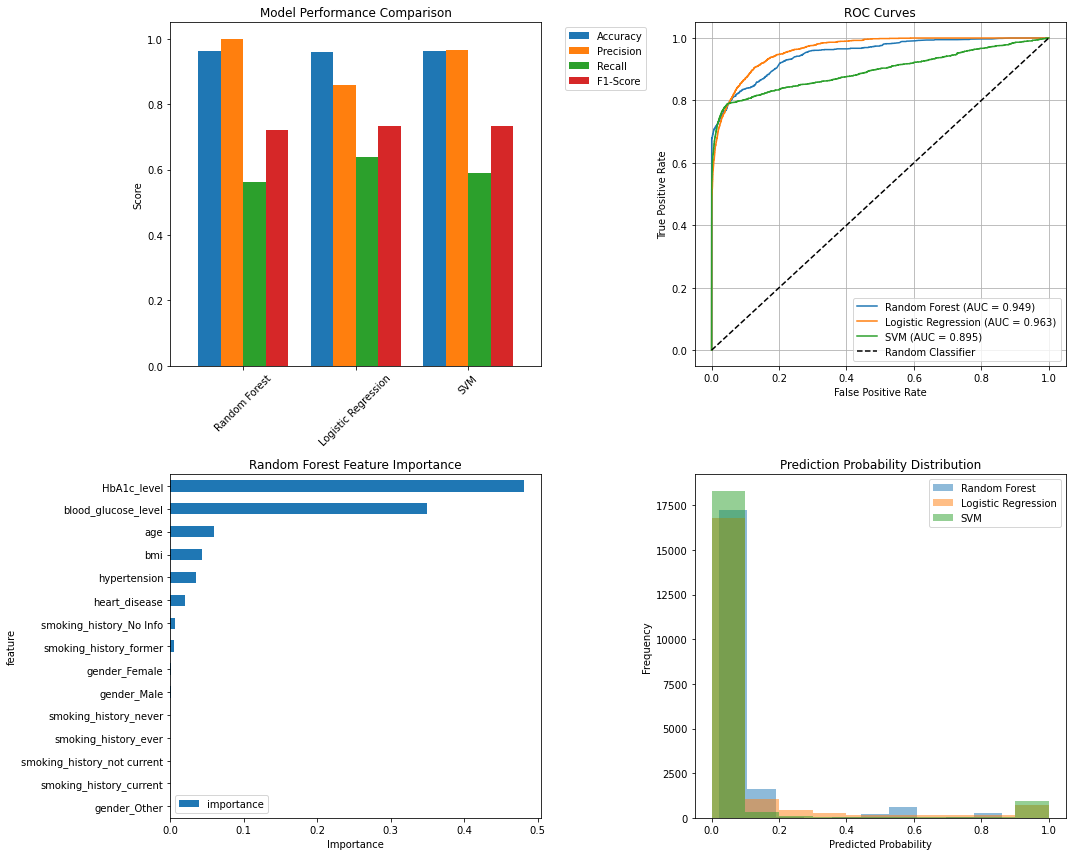


Model Performance Summary:
                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.9628     1.0000  0.5629    0.7204
Logistic Regression    0.9604     0.8593  0.6394    0.7332
SVM                    0.9633     0.9662  0.5888    0.7317


In [17]:
# Create performance comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(individual_models.keys())

performance_data = []
for name in model_names:
    if name in ['Logistic Regression', 'SVM']:
        test_pred = individual_models[name].predict(X_test_scaled)
    else:
        test_pred = individual_models[name].predict(X_test)
    
    accuracy = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred, zero_division=0)
    recall = recall_score(y_test, test_pred, zero_division=0)
    f1 = f1_score(y_test, test_pred, zero_division=0)
    
    performance_data.append([accuracy, precision, recall, f1])

performance_df = pd.DataFrame(performance_data, columns=metrics, index=model_names)

# Bar plot of performance metrics
ax1 = axes[0, 0]
performance_df.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Model Performance Comparison')
ax1.set_ylabel('Score')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(model_names, rotation=45)

# 2. ROC Curves
ax2 = axes[0, 1]
for name in model_names:
    fpr, tpr, _ = roc_curve(y_test, individual_probabilities[name])
    auc_score = roc_auc_score(y_test, individual_probabilities[name])
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves')
ax2.legend()
ax2.grid(True)

# 3. Feature Importance (Random Forest)
ax3 = axes[1, 0]
rf_importance = individual_models['Random Forest'].feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_importance
}).sort_values('importance', ascending=True)

importance_df.plot(x='feature', y='importance', kind='barh', ax=ax3)
ax3.set_title('Random Forest Feature Importance')
ax3.set_xlabel('Importance')

# 4. Prediction Probabilities Distribution
ax4 = axes[1, 1]
for name in model_names:
    ax4.hist(individual_probabilities[name], alpha=0.5, label=name, bins=10)
ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Frequency')
ax4.set_title('Prediction Probability Distribution')
ax4.legend()

plt.tight_layout()
plt.show()

# Print performance summary
print("\nModel Performance Summary:")
print("="*40)
print(performance_df.round(4))

In [18]:
# Create ensemble using VotingClassifier
print("Creating Ensemble Model...")
print("="*40)

# Create individual models for ensemble (with optimal parameters)
rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
lr_ensemble = LogisticRegression(random_state=42, max_iter=1000)
svm_ensemble = SVC(random_state=42, probability=True, kernel='rbf')

# Create ensemble with soft voting (uses prediction probabilities)
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_ensemble),
        ('lr', lr_ensemble),
        ('svm', svm_ensemble)
    ],
    voting='soft'
)

# Train ensemble model
# Note: We need to handle different scaling requirements
# Create a custom ensemble approach

class CustomEnsemble:
    def __init__(self, rf_model, lr_model, svm_model, scaler):
        self.rf_model = rf_model
        self.lr_model = lr_model
        self.svm_model = svm_model
        self.scaler = scaler
        
    def fit(self, X, y):
        # Train Random Forest on original data
        self.rf_model.fit(X, y)
        
        # Train LR and SVM on scaled data
        X_scaled = self.scaler.fit_transform(X)
        self.lr_model.fit(X_scaled, y)
        self.svm_model.fit(X_scaled, y)
        
    def predict(self, X):
        # Get predictions from all models
        rf_pred = self.rf_model.predict(X)
        
        X_scaled = self.scaler.transform(X)
        lr_pred = self.lr_model.predict(X_scaled)
        svm_pred = self.svm_model.predict(X_scaled)
        
        # Majority voting
        predictions = np.column_stack([rf_pred, lr_pred, svm_pred])
        ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
        
        return ensemble_pred
    
    def predict_proba(self, X):
        # Get prediction probabilities from all models
        rf_proba = self.rf_model.predict_proba(X)[:, 1]
        
        X_scaled = self.scaler.transform(X)
        lr_proba = self.lr_model.predict_proba(X_scaled)[:, 1]
        svm_proba = self.svm_model.predict_proba(X_scaled)[:, 1]
        
        # Average probabilities
        avg_proba = (rf_proba + lr_proba + svm_proba) / 3
        
        # Return probabilities for both classes
        return np.column_stack([1 - avg_proba, avg_proba])

# Initialize and train custom ensemble
ensemble = CustomEnsemble(
    RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3),
    LogisticRegression(random_state=42, max_iter=1000),
    SVC(random_state=42, probability=True, kernel='rbf'),
    StandardScaler()
)

ensemble.fit(X_train, y_train)

# Make predictions
ensemble_pred = ensemble.predict(X_test)
ensemble_proba = ensemble.predict_proba(X_test)[:, 1]

# Calculate ensemble performance
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred, zero_division=0)
ensemble_recall = recall_score(y_test, ensemble_pred, zero_division=0)
ensemble_f1 = f1_score(y_test, ensemble_pred, zero_division=0)
ensemble_auc = roc_auc_score(y_test, ensemble_proba)

print(f"Ensemble Model Performance:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1-Score: {ensemble_f1:.4f}")
print(f"AUC Score: {ensemble_auc:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, ensemble_pred))

Creating Ensemble Model...
Ensemble Model Performance:
Accuracy: 0.9663
Precision: 0.9689
Recall: 0.6229
F1-Score: 0.7583
AUC Score: 0.9598

Confusion Matrix:
[[18266    34]
 [  641  1059]]


Final Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score     AUC
0        Random Forest    0.9628     1.0000  0.5629    0.7204  0.9494
1  Logistic Regression    0.9604     0.8593  0.6394    0.7332  0.9625
2                  SVM    0.9633     0.9662  0.5888    0.7317  0.8948
3             Ensemble    0.9662     0.9689  0.6229    0.7583  0.9598


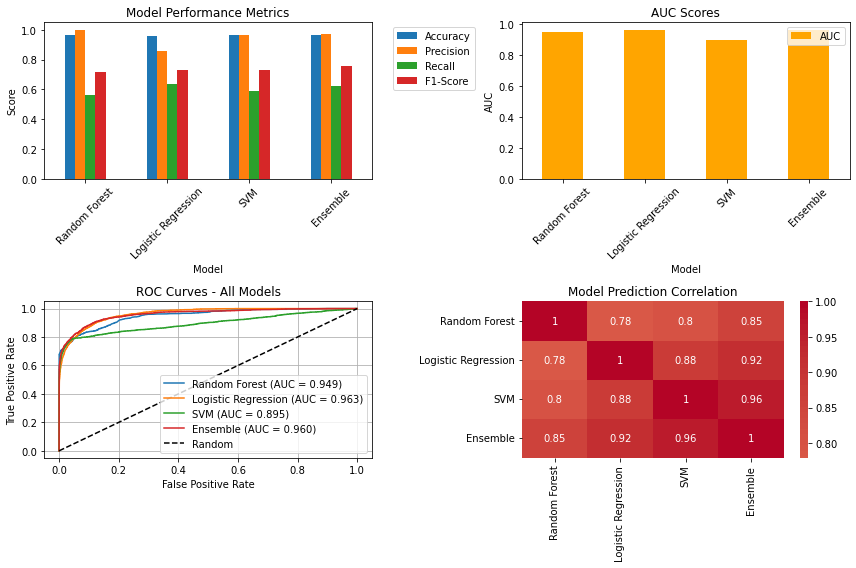


Best performing model: Ensemble
F1-Score: 0.7583


In [19]:
# Compare all models including ensemble
all_models = {**individual_models, 'Ensemble': ensemble}
all_predictions = {**individual_predictions, 'Ensemble': ensemble_pred}
all_probabilities = {**individual_probabilities, 'Ensemble': ensemble_proba}

# Create comprehensive comparison
comparison_data = []
for name in all_models.keys():
    if name == 'Ensemble':
        pred = ensemble_pred
        proba = ensemble_proba
    elif name in ['Logistic Regression', 'SVM']:
        pred = all_models[name].predict(X_test_scaled)
        proba = all_models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        pred = all_models[name].predict(X_test)
        proba = all_models[name].predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, zero_division=0)
    recall = recall_score(y_test, pred, zero_division=0)
    f1 = f1_score(y_test, pred, zero_division=0)
    auc = roc_auc_score(y_test, proba)
    
    comparison_data.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

comparison_df = pd.DataFrame(comparison_data)
print("Final Model Comparison:")
print("="*50)
print(comparison_df.round(4))

# Visualize final comparison
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
comparison_df.plot(x='Model', y='AUC', kind='bar', ax=plt.gca(), color='orange')
plt.title('AUC Scores')
plt.ylabel('AUC')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# ROC curves for all models
for name in all_models.keys():
    if name == 'Ensemble':
        proba = ensemble_proba
    elif name in ['Logistic Regression', 'SVM']:
        proba = all_models[name].predict_proba(X_test_scaled)[:, 1]
    else:
        proba = all_models[name].predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
# Model agreement analysis
predictions_df = pd.DataFrame(all_predictions)
correlation_matrix = predictions_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Model Prediction Correlation')

plt.tight_layout()
plt.show()

# Best model identification
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model}")
print(f"F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

In [23]:
import numpy as np
import pandas as pd

# Example input (replace with real values matching your feature order)
sample_data = pd.DataFrame([{
    'age': 72,
    'bmi': 27.94,
    'hypertension': 0,
    'heart_disease': 1,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 130,
    'gender_female': 1,
    'gender_male': 0,
    'gender_Other': 0,
    'smoking_history_never': 0,
    'smoking_history_current': 0,
    'smoking_history_former': 1,
    'smoking_history_ever': 0,
    'smoking_history_not current': 0,
    'smoking_history_No Info': 0
}])

# Make prediction
prediction = ensemble.predict(sample_data)
probability = ensemble.predict_proba(sample_data)[:, 1]

print("Predicted class:", prediction[0])
print("Probability of Diabetes:", probability[0])


Predicted class: 1
Probability of Diabetes: 0.6812338919120743


In [24]:
# Create a sample data point for prediction
sample_data = pd.DataFrame([{
    'age': 72,
    'bmi': 27.94,
    'hypertension': 0,
    'heart_disease': 1,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 130,
    'gender_female': 1,
    'gender_male': 0,
    'gender_Other': 0,
    'smoking_history_never': 0,
    'smoking_history_current': 0,
    'smoking_history_former': 1,
    'smoking_history_ever': 0,
    'smoking_history_not current': 0,
    'smoking_history_No Info': 0
}])

# Make a prediction
prediction = ensemble.predict(sample_data)
prediction_proba = ensemble.predict_proba(sample_data)

print(f"\nPrediction for sample data: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")
print(f"Prediction probabilities: {prediction_proba}")

# # Explain the prediction with SHAP
# # Create a SHAP explainer for the loaded model
# explainer = shap.KernelExplainer(loaded_model.predict_proba, shap.sample(X_train, 100))

# # Get the feature names after one-hot encoding
# ohe_feature_names = loaded_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# feature_names = numerical_features + list(ohe_feature_names)

# # Transform the sample data using the preprocessor
# transformed_sample = loaded_model.named_steps['preprocessor'].transform(sample_data)

# # Calculate SHAP values for the sample data
# shap_values = explainer.shap_values(transformed_sample)

# # Generate a force plot to explain the prediction
# shap.initjs()
# force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], transformed_sample, feature_names=feature_names, show=False)
# shap.save_html("shap_explanation.html", force_plot)

# print("\nSHAP explanation for the prediction has been saved to shap_explanation.html")


Prediction for sample data: Diabetic
Prediction probabilities: [[0.31876611 0.68123389]]


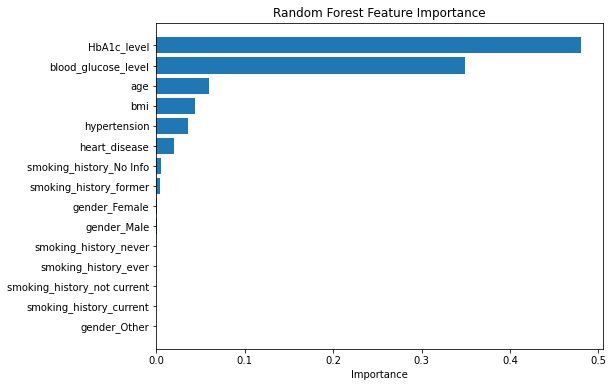

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances (averaged if ensemble is stacking/voting)
importances = individual_models['Random Forest'].feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.show()


Missing values:
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
gender_Female                  0
gender_Male                    0
gender_Other                   0
dtype: int64

Class distribution:
0    91500
1     8500
Name: diabetes, dtype: int64

Class balance: 0    0.915
1    0.085
Name: diabetes, dtype: float64


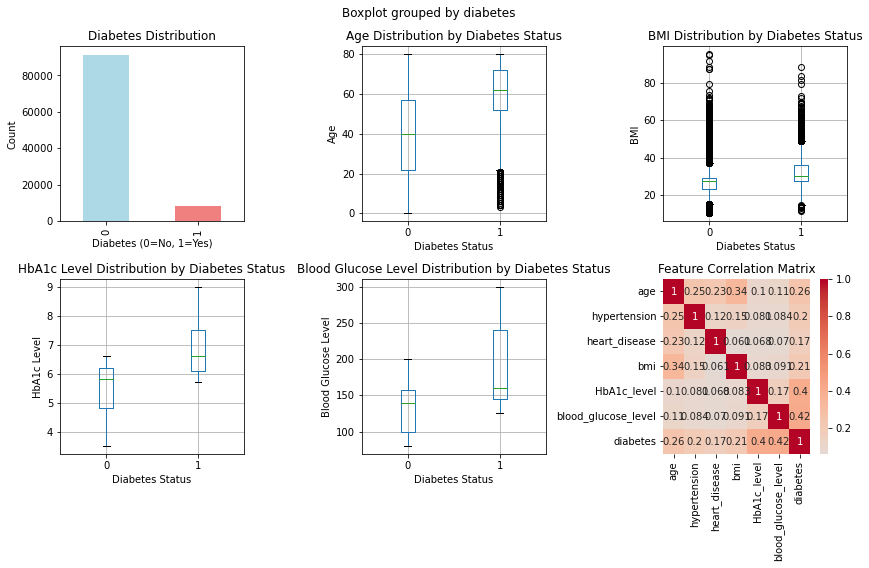


Categorical feature analysis:
Gender distribution by diabetes:


KeyError: 'gender'

In [25]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['diabetes'].value_counts())
print(f"\nClass balance: {df['diabetes'].value_counts(normalize=True)}")

# Visualize class distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
df['diabetes'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')

# Age distribution by diabetes status
plt.subplot(2, 3, 2)
df.boxplot(column='age', by='diabetes', ax=plt.gca())
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')

# BMI distribution by diabetes status
plt.subplot(2, 3, 3)
df.boxplot(column='bmi', by='diabetes', ax=plt.gca())
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')

# HbA1c level distribution by diabetes status
plt.subplot(2, 3, 4)
df.boxplot(column='HbA1c_level', by='diabetes', ax=plt.gca())
plt.title('HbA1c Level Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c Level')

# Blood glucose level distribution by diabetes status
plt.subplot(2, 3, 5)
df.boxplot(column='blood_glucose_level', by='diabetes', ax=plt.gca())
plt.title('Blood Glucose Level Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')

# Correlation heatmap for numerical features
plt.subplot(2, 3, 6)
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=plt.gca())
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Additional categorical analysis
print("\nCategorical feature analysis:")
print("Gender distribution by diabetes:")
print(pd.crosstab(df['gender'], df['diabetes'], normalize='columns'))
print("\nSmoking history distribution by diabetes:")
print(pd.crosstab(df['smoking_history'], df['diabetes'], normalize='columns'))